In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA AQUISITION

In [ ]:
df=pd.read_csv('adult - adult.csv')

DATA PREPROCESSING

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#normalization
from sklearn.preprocessing import MinMaxScaler
x_list = ['educational-num','capital-gain','capital-loss','hours-per-week']
scaled=MinMaxScaler().fit_transform(df[x_list])

In [8]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [9]:
df[x_list]=scaled

In [10]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.397959,United-States,<=50K
1,38,Private,89814,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,0.500000,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,0.397959,United-States,>50K


In [11]:
x=['fnlwgt']
sc=MinMaxScaler().fit_transform(df[x])
df[x]=sc

In [12]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [13]:
#ENCODING
from sklearn.preprocessing import LabelEncoder
df['enc_edu']=LabelEncoder().fit_transform(df['education'])

In [14]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,enc_edu
0,25,Private,0.145129,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.397959,United-States,<=50K,1
1,38,Private,0.052451,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,0.500000,United-States,<=50K,11


In [15]:
df['enc_workclass']=LabelEncoder().fit_transform(df['workclass'])
df['enc_m_status']=LabelEncoder().fit_transform(df['marital-status'])
df['enc_occu']=LabelEncoder().fit_transform(df['occupation'])
df['enc_relationship']=LabelEncoder().fit_transform(df['relationship'])


In [16]:
df['enc_race']=LabelEncoder().fit_transform(df['race'])
df['enc_gender']=LabelEncoder().fit_transform(df['gender'])

In [17]:
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               48842 non-null  int64  
 1   workclass         48842 non-null  object 
 2   fnlwgt            48842 non-null  float64
 3   education         48842 non-null  object 
 4   educational-num   48842 non-null  float64
 5   marital-status    48842 non-null  object 
 6   occupation        48842 non-null  object 
 7   relationship      48842 non-null  object 
 8   race              48842 non-null  object 
 9   gender            48842 non-null  object 
 10  capital-gain      48842 non-null  float64
 11  capital-loss      48842 non-null  float64
 12  hours-per-week    48842 non-null  float64
 13  native-country    48842 non-null  object 
 14  income            48842 non-null  int64  
 15  enc_edu           48842 non-null  int64  
 16  enc_workclass     48842 non-null  int64 

(array([8432., 8686., 9120., 9157., 5965., 3876., 2456.,  777.,  277.,
          96.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

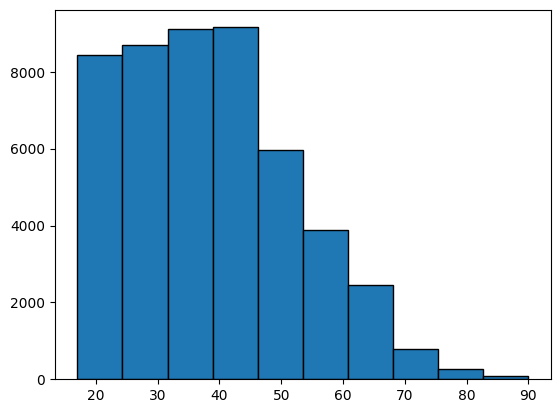

In [19]:
plt.hist(df['age'],bins=10,edgecolor='black')

MODELING

In [20]:
x=df.drop(['native-country','workclass','education','marital-status','occupation','relationship','race','gender','income'],axis=1)
y=df['income']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=100)
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8149247620022521

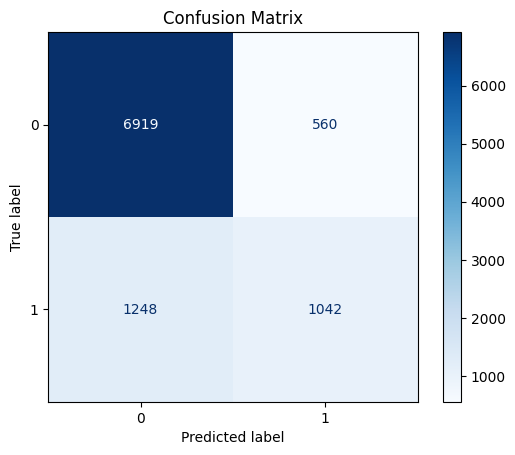

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)

In [28]:
knn_acc=accuracy_score(y_test,y_pred1)
knn_acc

0.8157436789845429

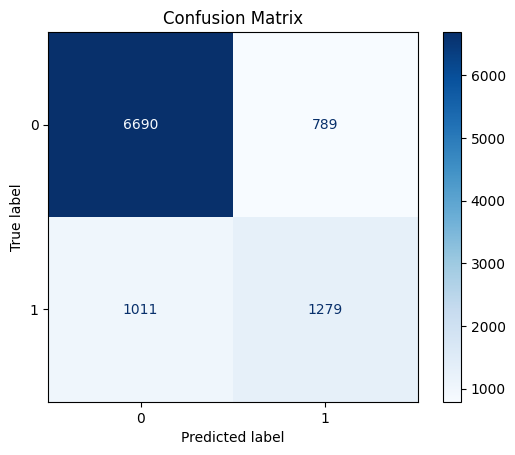

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

DICISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)

In [31]:
dt_acc=accuracy_score(y_test,y_pred2)
dt_acc

0.8163578667212611

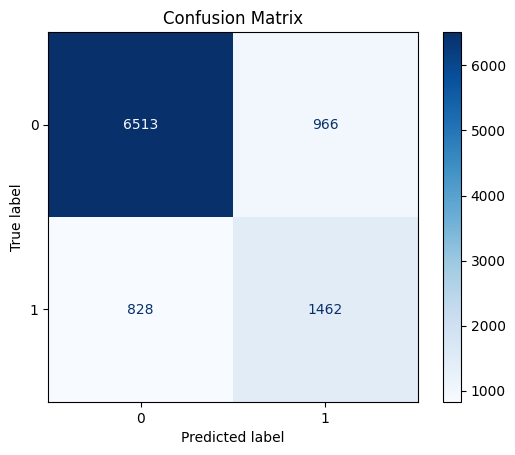

In [32]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

CHECKING WHICH MODEL IS MOST ACCURATE

In [33]:
if accuracy > knn_acc and accuracy > dt_acc:
    print('Logistic regression gives the most accurate prediction')
elif knn_acc > accuracy and knn_acc > dt_acc:
    print('KNN gives the most accurate prediction')
else:
    print('Dicision Tree gives the most accurate prediction')

Dicision Tree gives the most accurate prediction
